### MACHINE LEARNING PROJECT

I'll try to build and train a ML model to predict if a painting is an original paiting from a known artist. I decided to start form a list of 15 artis with a noticeable style difference:
* Andy Warhol
* Caravaggio
* Claude Monet
* Diego Rivera
* Diego Velazquez
* *Edgar Degas
* *Francisco de Goya
* Frida Kahlo
* Gustav Klimt
* Jackson Pollock
* Joaquín Sorolla
* Katsushika Hokusai
* Pablo Picasso
* Piet Mondrian
* Roy Lichtenstein
* Wassily Kandinsky

I set three objectives:
* Classify if Picasso or Monet
* Classify by *'school' or 'style'*
* Classify by artist

I will use the following characteristics to try to classify the images:
* Dimension ratio
* Filling ratio (white pixels vs. total pixels ratio)
* Chiaroscuro (white pixels vs. black pixels ratio)
* 10 main colors used from a palette of 125

10917

___
### PREREQUISITES

To process images I'll be using OpenCV library. It is important to take a look at the [docs][OpenCV installation and usage] before running the next cell.
For this project I'll use the 'main modules package'

[OpenCV installation and usage]:https://pypi.org/project/opencv-python/

In [1]:
# !pip install opencv-python

In [2]:
### TODO - .yaml

___
### IMPORTS

In [16]:
# Modules used for data handling / test
import os
import csv
import cv2
import pathlib
import time

# from utils import item_to_lists, flatten, mklist, nameof


# Modules used for EDA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.patches import Rectangle
# from utils import plot_colors


# Modules used for image processing
import cv2

from collections import Counter
# from utils import crop_img, chiaroscuro, extract_img_data, hex_to_rgb
# from utils import fill_ratio, get_img_rgb, reduce_col_palette
# from utils import resize_img, rgb_to_hex, process_color


# Modules used for ML
from sklearn.cluster import KMeans
# from utils import color_quant

In [2]:
# Modules settings
%matplotlib inline

___
### UPDATE UTILS

In [17]:
from utils import item_to_lists, get_collection, show_collection, mklist, nameof
from utils import plot_colors
from utils import crop_img, chi_osc, extract_img_data, hex_to_rgb
from utils import get_img_rgb, reduce_col_palette, whitespace
from utils import resize_img, rgb_to_hex, process_color
from utils import color_quant

In [65]:
# This cell only needs to be executed to update utils
# if modified after them have been imported

%run utils

___
### GETTING IMAGES

In [20]:
collection = get_collection(path='./images/sample_img/', extensions=['.jpg'])

collection

[PurePosixPath('images/sample_img/R&M_01.jpg'),
 PurePosixPath('images/sample_img/R&M_02.jpg'),
 PurePosixPath('images/sample_img/R&M_04.jpg'),
 PurePosixPath('images/sample_img/R&M_03.jpg'),
 PurePosixPath('images/sample_img/R&M_05.jpg')]

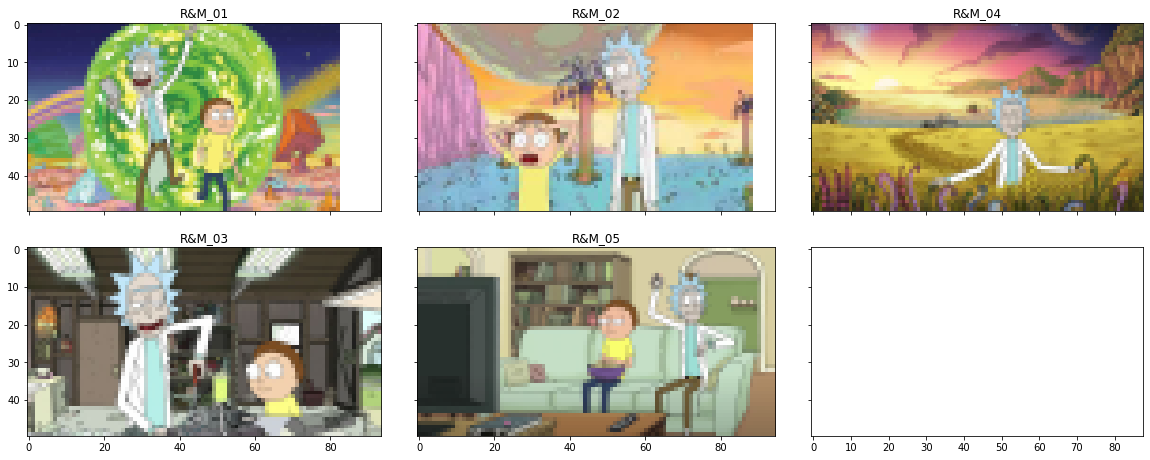

In [21]:
show_collection(collection, cols=3)

___
### IMAGES MANIPULATION

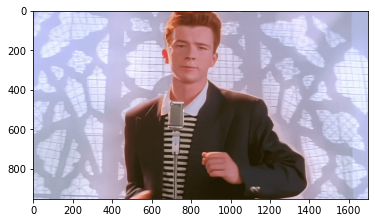

In [24]:
sample = get_img_rgb('./images/sample_img/secret/sample.jpeg')
plt.imshow(sample);

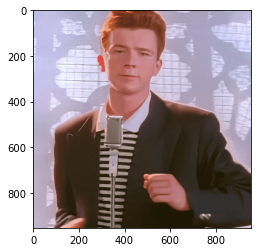

In [25]:
sample = crop_img(sample)
plt.imshow(sample);

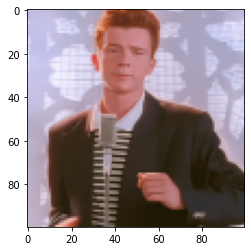

In [26]:
sample = resize_img(sample, 100)
plt.imshow(sample);

Palette reduced to 125 colors.


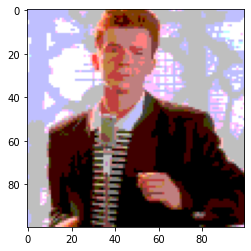

In [27]:
sample = reduce_col_palette(sample, 5, info=True)
plt.imshow(sample);

___
### DATA EXTRACTION

In [37]:
# The data found in each image will be stored in this lists
file, artist, dim_ratio, whitespace_ratio, chiaroscuro = mklist(5)
c_01, c_02, c_03, c_04, c_05, c_06, c_07, c_08, c_09, c_10  = mklist(10)

# To make it easier to add elements to every list, a 'superlist' is created
dset_test = [file, artist, dim_ratio, whitespace_ratio, chiaroscuro,
             c_01, c_02, c_03, c_04, c_05,
             c_06, c_07, c_08, c_09, c_10,]

dset_test

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

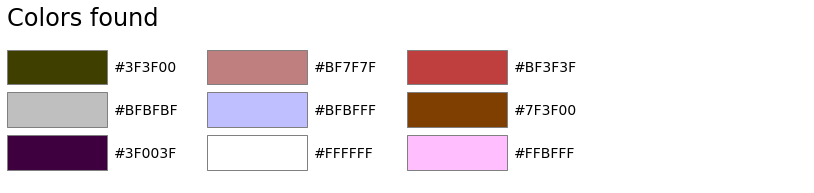

In [29]:
colors, dic_colors = color_quant(sample, 5, num_of_colors=10, show_chart=True)

In [30]:
colors

['#3F3F00',
 '#BFBFBF',
 '#3F003F',
 '#BF7F7F',
 '#BFBFFF',
 '#FFFFFF',
 '#3F003F',
 '#BF3F3F',
 '#7F3F00',
 '#FFBFFF']

In [31]:
chi_osc(sample)

0.05249204665959703

In [32]:
whitespace(sample)

91.97

In [41]:
errors_log = extract_img_data(collection,
                              dset_test,
                              square=True,
                              resize=True,
                              height=100,
                              reduce_colors=True,
                              colors_per_channel=5,
                              target_class='sample',
                              save=True,
                              save_path='./images/sample_img/')

0 errors raised from 5 pictures in sample collection.


In [34]:
dset_test

[['R&M_01', 'R&M_02', 'R&M_04', 'R&M_03', 'R&M_05'],
 ['sample', 'sample', 'sample', 'sample', 'sample'],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [94.15, 92.58, 96.68, 82.91, 98.26],
 [33.0, 99.0, 4.95, 0.16203, 1.04211],
 ['#FFFFBF', '#FFBFBF', '#FFFFFF', '#BFBFBF', '#3F0000'],
 ['#3FBF3F', '#7F7F3F', '#BF3F7F', '#3F3F3F', '#BFFFBF'],
 ['#BFBF3F', '#FFFFBF', '#3F0000', '#FFFFFF', '#7F7F7F'],
 ['#7F3F3F', '#BFBF7F', '#FFBF3F', '#7F7F7F', '#FFBFBF'],
 ['#00003F', '#7FBFBF', '#7F7F00', '#3F3F00', '#7F7F3F'],
 ['#BFBFBF', '#FFBF7F', '#FFFF7F', '#3F3F3F', '#3F3F3F'],
 ['#7FBF3F', '#FFFFFF', '#7F3F3F', '#BFFFFF', '#FFFFBF'],
 ['#BFFF3F', '#7FBFFF', '#BFBF7F', '#FFFFBF', '#7F3F00'],
 ['#007F3F', '#BF7F7F', '#FF7F7F', '#3F0000', '#BFBF7F'],
 ['#FFFFFF', '#FFFF7F', '#BF7F00', '#7F3F00', '#7FBF7F']]

In [45]:
# The data found in each image will be stored in this lists
file, artist, dim_ratio, whitespace_ratio, chiaroscuro = mklist(5)

# To make it easier to add elements to every list, a 'superlist' is created
dset_test = [file, artist, dim_ratio, whitespace_ratio, chiaroscuro]

dset_test

[[], [], [], [], []]

In [79]:
os.getcwd()

'/Volumes/GoogleDrive/My Drive/BatallaPro/01.- Programación/Code/The Bridge/Data_science_bootcamp/Entregables/Is-this-Picasso---Academic-ML-classificator'

In [78]:
os.chdir('../../')
#os.chdir('./Entregables/Is-this-Picasso---Academic-ML-classificator')

In [86]:


data_collection, errors_log = extract_img_data(collection,
                              square=False,
                              resize=True,
                              height=100,
                              limit_colors=True,
                              colors_per_channel=5,
                              target_class='sample',
                              save=True,
                              save_path='./images/sample_img')

0 errors raised from 5 pictures in sample collection.


___
### DATA EXTRACTION

In [135]:
dset_test

[['R&M_01',
  'R&M_02',
  'R&M_04',
  'R&M_03',
  'R&M_05',
  'R&M_01',
  'R&M_02',
  'R&M_04',
  'R&M_03',
  'R&M_05',
  'R&M_01',
  'R&M_02',
  'R&M_04',
  'R&M_03',
  'R&M_05',
  'R&M_01',
  'R&M_01',
  'R&M_01',
  'R&M_01',
  'R&M_01'],
 ['sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample',
  'sample'],
 [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.60241,
  0.5618,
  0.56497,
  0.5291,
  0.52632,
  0.60241,
  0.60241,
  0.60241,
  0.60241,
  0.60241],
 [1,
  1,
  1,
  1,
  1,
  94.15,
  92.58,
  96.68,
  82.91,
  98.26,
  96.27108,
  95.76966,
  98.0452,
  87.85714,
  97.28947,
  96.27108,
  96.27108,
  96.27108,
  96.27108,
  96.27108],
 [1,
  1,
  1,
  1,
  1,
  33.0,
  99.0,
  4.95,
  0.16203,
  1.04211,
  82.5,
  88.5,
  1.85263,
  0.1102,
  0.10553,
  82.5,
  82.5,
  82.5,
  82.5

In [ ]:
# The data found in each image will be stored in this lists
name, ratio, fill_rt, chi_osc, target = mklist(5)
c_01, c_02, c_03, c_04, c_05, c_06, c_07, c_08, c_09, c_10  = mklist(10)

# To make it easier to add elements to every list, a 'superlist' is created
paintings_dset = [name, target, ratio, fill_rt, chi_osc,
                  c_01, c_02, c_03, c_04, c_05,
                  c_06, c_07, c_08, c_09, c_10,]

paintings_dset

I will create a *collection* for each artist that later on  I will merge into a *museum*

In [ ]:
dset_caravaggio = paintings_dset.copy()
dset_degas = paintings_dset.copy()
dset_goya = paintings_dset.copy()
dset_hokusai = paintings_dset.copy()
dset_kahlo = paintings_dset.copy()
dset_kandinsky = paintings_dset.copy()
dset_klimt = paintings_dset.copy()
dset_lichtenstein = paintings_dset.copy()
dset_mondrian = paintings_dset.copy()
dset_monet = paintings_dset.copy()
dset_picasso = paintings_dset.copy()
dset_pollock = paintings_dset.copy()
dset_rivera = paintings_dset.copy()
dset_sorolla = paintings_dset.copy()
dset_velazquez = paintings_dset.copy()
dset_warhol = paintings_dset.copy()

In [ ]:
artists = ['Caravaggio', 'Degas', 'Goya', 'Hokusai', 'Kahlo',
           'Kandinsky', 'Klimt', 'Lichtenstein', 'Mondrian', 'Monet',
           'Picasso', 'Pollock', 'Rivera', 'Sorolla', 'Velazquez',
           'Warhol']

In [ ]:
# for artist in artists:
#     errors, errors_log = extract_img_data(path, collection, dset_test, 'Test')
#     path, collection = get_collection('./images/sample_img/', ['.jpg'])

In [ ]:
plt.imshow(sample);

In [ ]:
# for work in collection:
#     work = str(work)
#     img_name = work.split(sep='/')[-1]
#     print('./images/mod_artists_img/test/' + img_name)